In [264]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [160]:
pcos = pd.read_csv('CLEAN- PCOS SURVEY SPREADSHEET.csv')

In [161]:
pcos.head()

,Age (in Years),Weight (in Kg),Height (in Cm / Feet),Can you tell us your blood group ?,After how many months do you get your periods?\n(select 1- if every month/regular),Have you gained weight recently?,Do you have excessive body/facial hair growth ?,Are you noticing skin darkening recently?,Do have hair loss/hair thinning/baldness ?,Do you have pimples/acne on your face/jawline ?,Do you eat fast food regularly ?,Do you exercise on a regular basis ?,Have you been diagnosed with PCOS/PCOD?,Do you experience mood swings ?,Are your periods regular ?,"How long does your period last ? (in Days)\nexample- 1,2,3,4....."
0,21,47.0,168.0,13,1,0,0,0,0,0,0,0,0,1,1,6
1,21,45.0,156.0,11,1,0,0,1,1,1,0,0,0,1,1,4
2,17,37.0,162.0,15,1,0,0,0,0,1,1,0,0,1,1,6
3,28,54.0,160.0,15,1,0,0,0,0,0,0,0,0,1,1,4
4,45,40.0,150.0,13,2,0,0,0,1,0,0,0,1,1,0,7


In [162]:
df = pd.DataFrame(pcos)

In [163]:
df.rename(columns={'Age (in Years)': 'Age'}, inplace=True)

In [164]:
df.rename(columns={'Weight (in Kg)': 'Weight'}, inplace=True)

In [165]:
df.rename(columns={'Height (in Cm / Feet)': 'Height'}, inplace=True)

In [166]:
df.rename(columns={'After how many months do you get your periods?\n(select 1- if every month/regular)': 'period_frequency'}, inplace=True)

In [167]:
df.rename(columns={'Can you tell us your blood group ?': 'blood_group'}, inplace=True)

In [168]:
df.rename(columns={'Have you gained weight recently?': 'weight_increased'}, inplace=True)

In [169]:
df.rename(columns={'Do you have excessive body/facial hair growth ?': 'excessive_hair'}, inplace=True)

In [170]:
df.rename(columns={'Are you noticing skin darkening recently?': 'skin_darkening'}, inplace=True)

In [171]:
df.rename(columns={'Do have hair loss/hair thinning/baldness ?': 'baldness'}, inplace=True)

In [172]:
df.rename(columns={'Do you eat fast food regularly ?': 'fast_food'}, inplace=True)

In [173]:
df.rename(columns={'Do you exercise on a regular basis ?': 'exercise'}, inplace=True)

In [174]:
df.rename(columns={'Do you experience mood swings ?': 'mood_swings'}, inplace=True)

In [175]:

df.rename(columns={'Are your periods regular ?': 'regular_period'}, inplace=True)

In [176]:
df.rename(columns={'How long does your period last ? (in Days)\nexample- 1,2,3,4.....': 'period_days'}, inplace=True)

In [177]:
df.rename(columns={'Have you been diagnosed with PCOS/PCOD?': 'PCOS'}, inplace=True)

In [178]:
df.rename(columns={'Do you have pimples/acne on your face/jawline ?': 'pimples'}, inplace=True)

In [179]:
df.head()

,Age,Weight,Height,blood_group,period_frequency,weight_increased,excessive_hair,skin_darkening,baldness,pimples,fast_food,exercise,PCOS,mood_swings,regular_period,period_days
0,21,47.0,168.0,13,1,0,0,0,0,0,0,0,0,1,1,6
1,21,45.0,156.0,11,1,0,0,1,1,1,0,0,0,1,1,4
2,17,37.0,162.0,15,1,0,0,0,0,1,1,0,0,1,1,6
3,28,54.0,160.0,15,1,0,0,0,0,0,0,0,0,1,1,4
4,45,40.0,150.0,13,2,0,0,0,1,0,0,0,1,1,0,7


In [180]:
#checking for null values in the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               465 non-null    int64  
 1   Weight            465 non-null    float64
 2   Height            465 non-null    float64
 3   blood_group       465 non-null    int64  
 4   period_frequency  465 non-null    int64  
 5   weight_increased  465 non-null    int64  
 6   excessive_hair    465 non-null    int64  
 7   skin_darkening    465 non-null    int64  
 8   baldness          465 non-null    int64  
 9   pimples           465 non-null    int64  
 10  fast_food         465 non-null    int64  
 11  exercise          465 non-null    int64  
 12  PCOS              465 non-null    int64  
 13  mood_swings       465 non-null    int64  
 14  regular_period    465 non-null    int64  
 15  period_days       465 non-null    int64  
dtypes: float64(2), int64(14)
memory usage: 58.3 

In [181]:
df = df.drop('period_frequency',axis=1)

In [182]:
variables = df.drop('PCOS', axis=1)
target = df['PCOS']

<Axes: xlabel='PCOS', ylabel='count'>

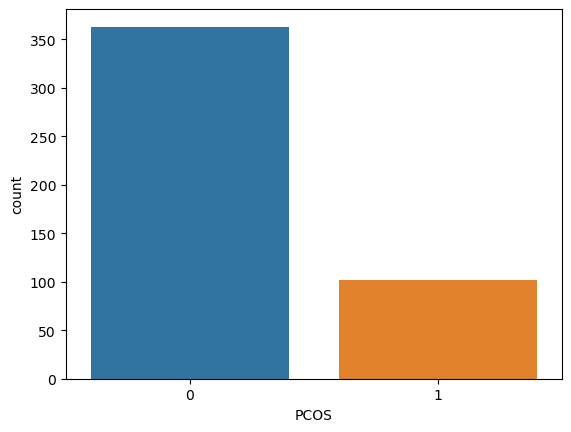

In [183]:
#plot the target variable
sns.countplot(x='PCOS', data=pcos)

In [184]:
from sklearn.utils import resample
pcos_majority = pcos[pcos['PCOS']==0]
pcos_minority = pcos[pcos['PCOS']==1]

pcos_minority_upsampled = resample(pcos_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=200,    # to match majority class
                                 random_state=123) # reproducible results
pcos_majority_downsampled = resample(pcos_majority, 
                                 replace=False,     # sample with replacement
                                 n_samples=200,    # to match majority class
                                 random_state=123) # reproducible results
pcos = pd.concat([pcos_majority_downsampled, pcos_minority_upsampled])

In [185]:
pcos_majority.count()

Age                 363
Weight              363
Height              363
blood_group         363
period_frequency    363
weight_increased    363
excessive_hair      363
skin_darkening      363
baldness            363
pimples             363
fast_food           363
exercise            363
PCOS                363
mood_swings         363
regular_period      363
period_days         363
dtype: int64

In [186]:
pcos_minority.count()

Age                 102
Weight              102
Height              102
blood_group         102
period_frequency    102
weight_increased    102
excessive_hair      102
skin_darkening      102
baldness            102
pimples             102
fast_food           102
exercise            102
PCOS                102
mood_swings         102
regular_period      102
period_days         102
dtype: int64

<Axes: xlabel='PCOS', ylabel='count'>

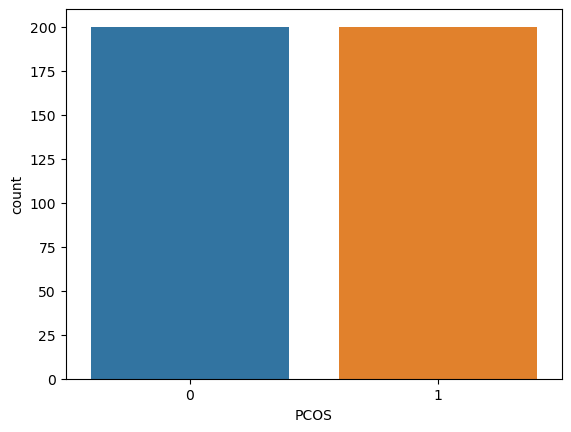

In [187]:
#plot the target variable
sns.countplot(x='PCOS', data=pcos)

In [188]:
X_train, X_val, y_train, y_val = train_test_split(variables, 
                                                  target, 
                                                  train_size = 0.7, 
                                                  random_state = 0, 
                                                  stratify = target, 
                                                  shuffle = True)

In [189]:
all_train = X_train.join(y_train)

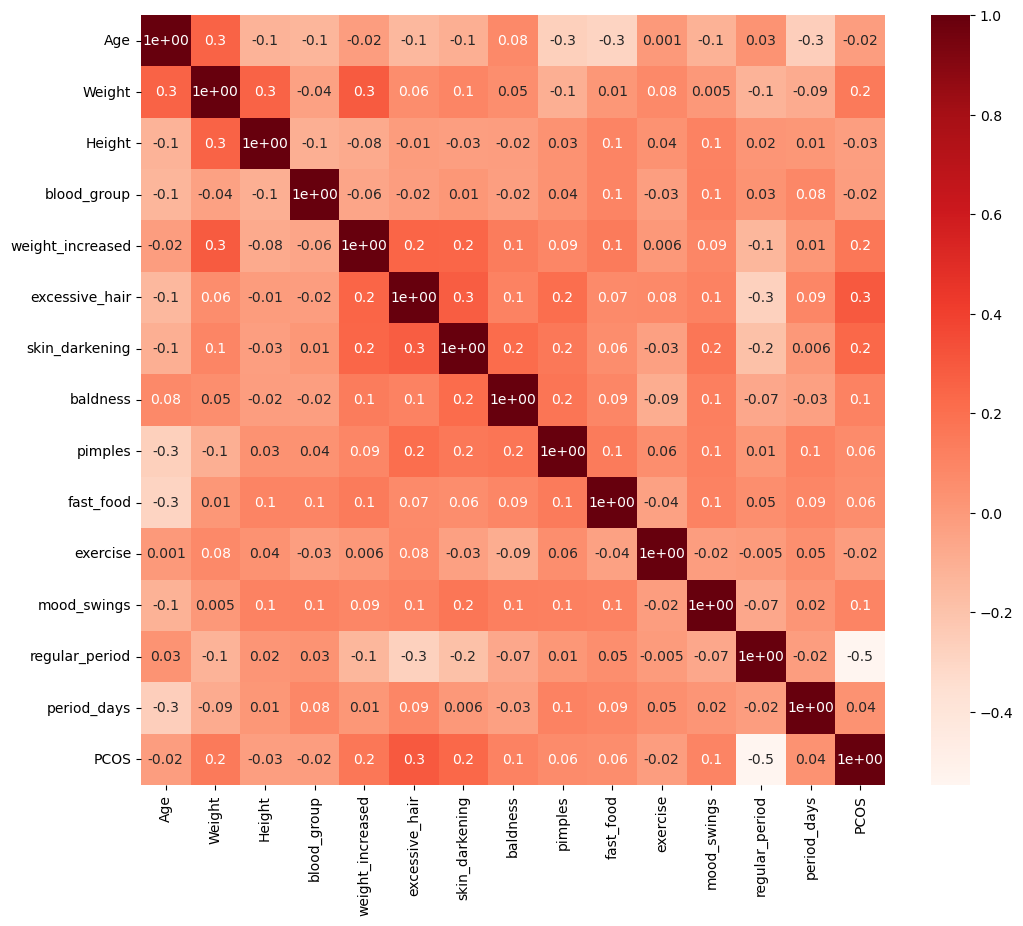

In [190]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()
cor_spearman = all_train.corr(method ='spearman')
cor_heatmap(cor_spearman)

In [191]:
log_model = LogisticRegression().fit(X_train,y_train)

D:\anacoda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [192]:
y_pred = log_model.predict(X_val)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [193]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       109
           1       0.71      0.65      0.68        31

    accuracy                           0.86       140
   macro avg       0.81      0.79      0.80       140
weighted avg       0.86      0.86      0.86       140



In [194]:
modelDT = DecisionTreeClassifier()


In [195]:
modelDT.fit(X_train,y_train)

DecisionTreeClassifier()

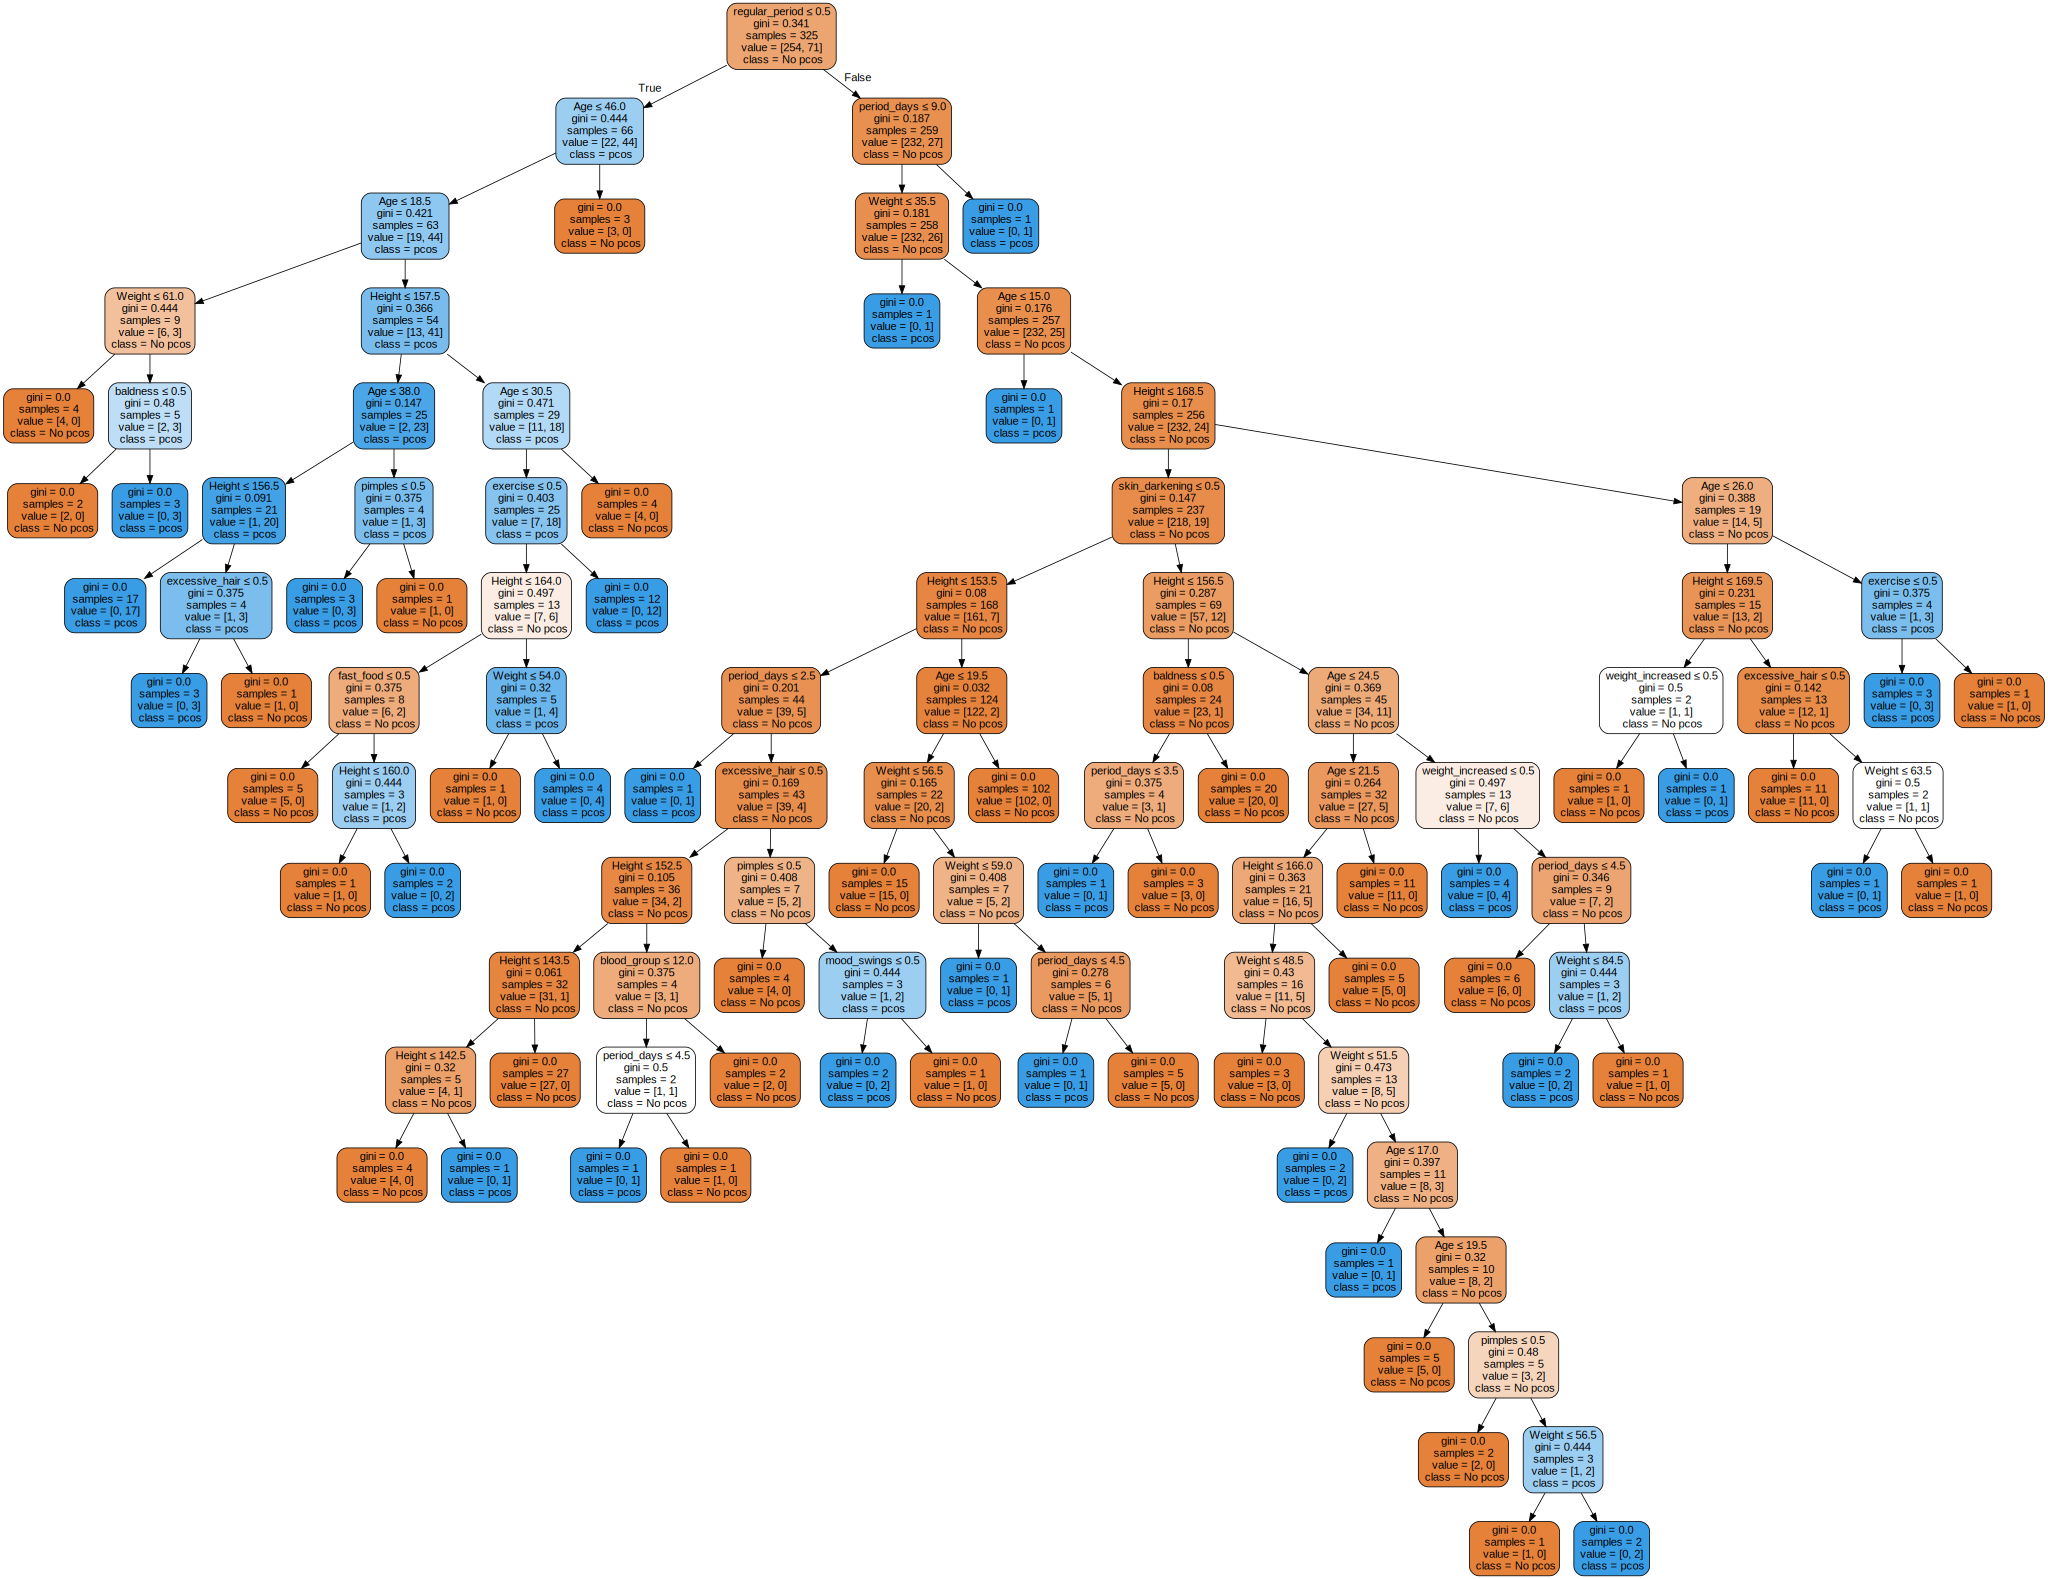

In [199]:
from sklearn import tree
import graphviz
# Process a decision tree graph using Graphviz
dot_data = tree.export_graphviz(modelDT,
                                out_file=None,
                                feature_names=variables.columns,
                                class_names=["No pcos", "pcos"],
                                filled=True,
                                rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [200]:
modelDT.predict(X_val)

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [201]:
modelDT.predict(X_train)

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [202]:
modelDT.predict_proba(X_val)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.

In [203]:
modelDT.score(X_train,y_train)

1.0

In [204]:
modelDT.score(X_val,y_val)

0.7928571428571428

In [205]:
modelDT.feature_importances_

array([0.16476474, 0.11688061, 0.11470944, 0.00450538, 0.03920065,
       0.02673534, 0.0154159 , 0.0253803 , 0.03685829, 0.01501793,
       0.04612122, 0.01201434, 0.2998282 , 0.08256767])

In [206]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(5,3))
    plt.barh(range(n_features), model.feature_importances_, color='yellowgreen')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.title('Feature Importance in Decision Tree Classifier')
    plt.show()

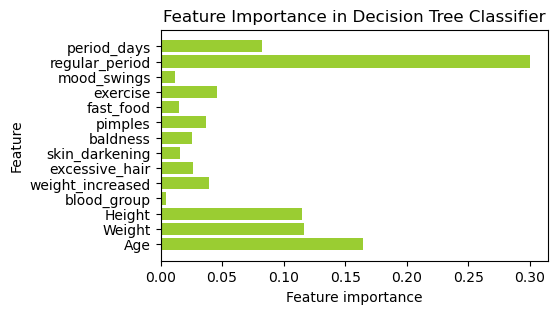

In [207]:
plot_feature_importances(modelDT)

In [208]:
#change the splitting criterion from gini to entropy
modelDTE = DecisionTreeClassifier(criterion='entropy').fit(X_train,y_train)

In [209]:
modelDTE.score(X_train , y_train)

1.0

In [210]:
modelDTE.score(X_val , y_val)

0.7428571428571429

In [244]:
#changing the maximum depth
model_max_depth= DecisionTreeClassifier(max_depth=5).fit(X_train,y_train)

In [245]:
model_max_depth.score(X_train,y_train)

0.8984615384615384

In [246]:
model_max_depth.score(X_val,y_val)

0.8285714285714286

In [250]:
#Changing the Number of Leaf Nodes
model_nodes= DecisionTreeClassifier(max_leaf_nodes=13).fit(X_train,y_train)

In [251]:
model_nodes.score(X_train,y_train)

0.9076923076923077

In [252]:
model_nodes.score(X_val,y_val)

0.8142857142857143

In [241]:
scores_train = []
scores_test = []
for i in range(1,10):
    DTC = DecisionTreeClassifier(max_depth=i)
    DTC.fit(X_train, y_train)
    scores_train.append(DTC.score(X_train, y_train))
    scores_test.append(DTC.score(X_val, y_val))

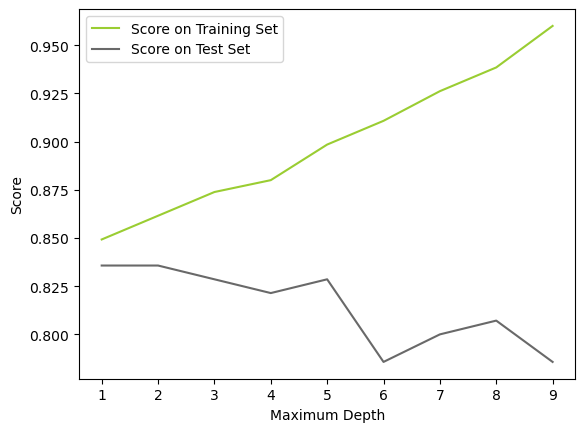

In [243]:
plt.plot(list(range(1,10)), scores_train, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(1,10)), scores_test, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

In [248]:
scores_train = []
scores_test = []
parameters = []
for i in range(10, 20):
    for j in range(1,7):
        parameters.append([i,j])
        DTR = DecisionTreeClassifier(min_samples_split=i, max_depth=j)
        DTR.fit(X_train, y_train)
        scores_train.append(DTR.score(X_train, y_train))
        scores_test.append(DTR.score(X_val, y_val))

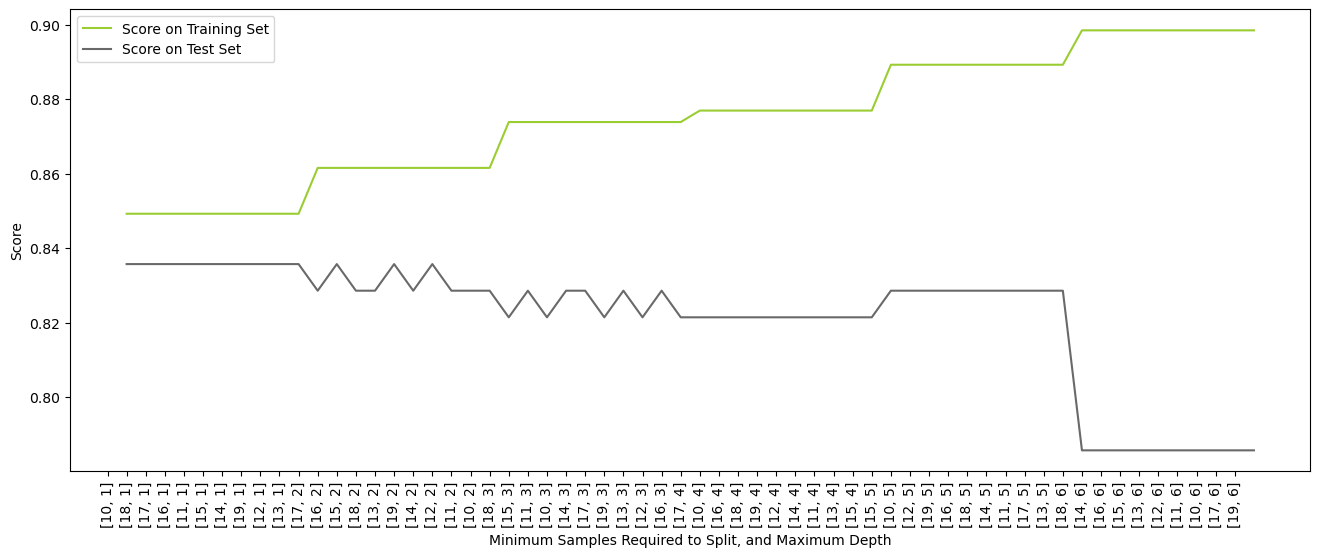

In [249]:
scores = pd.DataFrame({'Score_Train': scores_train,'Score_Test': scores_test,'Parameters': parameters}).sort_values(by=['Score_Train'])
plt.figure(figsize=(16,6))
plt.plot(list(range(1,61)), scores['Score_Train'], label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(1,61)), scores['Score_Test'], label="Score on Test Set", color='dimgray')
plt.xlabel("Minimum Samples Required to Split, and Maximum Depth")
plt.ylabel("Score")
plt.xticks(np.arange(len(parameters)), scores['Parameters'])
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [260]:
best_model = DecisionTreeClassifier(max_leaf_nodes=13,max_depth=5).fit(X_train,y_train)

In [261]:
pred_best = best_model.predict(X_val)

In [262]:
print("Decision Tree Classifier")
print(classification_report(y_val, pred_best))

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       109
           1       0.62      0.58      0.60        31

    accuracy                           0.83       140
   macro avg       0.75      0.74      0.75       140
weighted avg       0.82      0.83      0.83       140



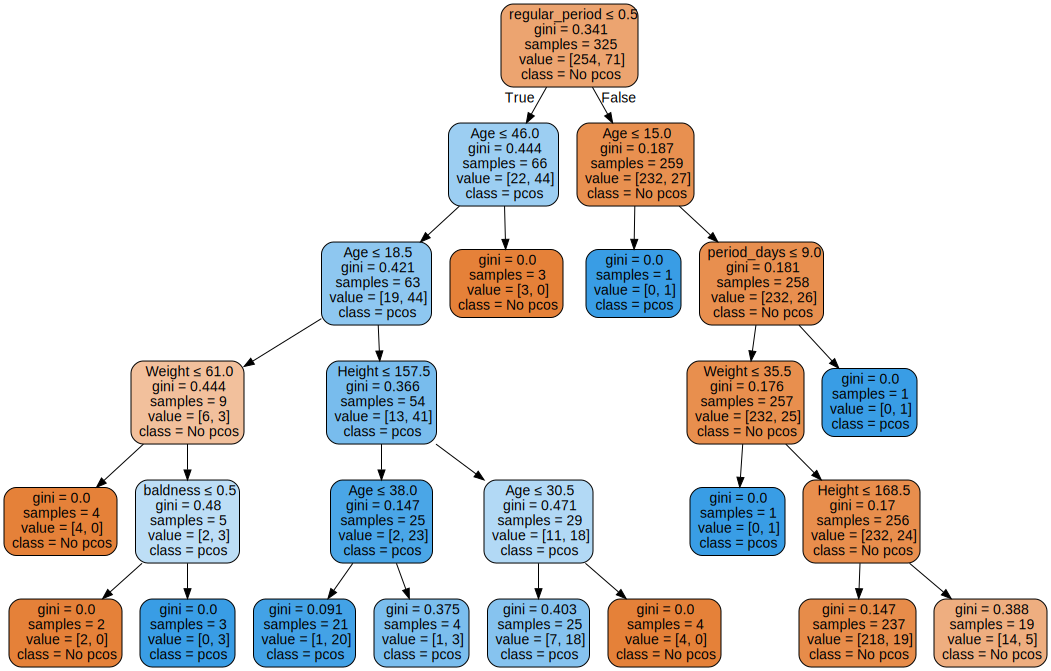

In [263]:
from sklearn import tree
import graphviz
# Process a decision tree graph using Graphviz
dot_data = tree.export_graphviz(best_model,
                                out_file=None,
                                feature_names=variables.columns,
                                class_names=["No pcos", "pcos"],
                                filled=True,
                                rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph